In [1]:
from epyt import epanet
import random

In [2]:
d=epanet('Net2.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net2.inp loaded successfully.



In [3]:
pipe_counts=d.getLinkPipeCount()

In [4]:
pipe_indices=d.getLinkPipeIndex()

In [5]:
pipe_counts

40

In [6]:
pipe_indices

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [7]:
d.openHydraulicAnalysis()
d.initializeHydraulicAnalysis()

In [8]:
step=1

In [9]:
Flows=[]

In [11]:
while step>0:
    Status=[random.randint(0,1) for i in range(pipe_counts)]
    t=d.runHydraulicAnalysis()
    d.setLinkStatus(pipe_indices,Status)
    Flows.append(d.getLinkFlows())
    step=d.nextHydraulicAnalysisStep()
d.closeHydraulicAnalysis()

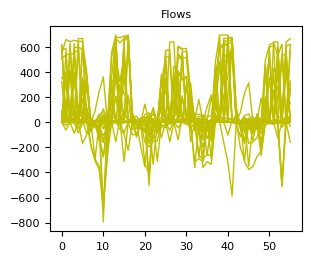

In [19]:
d.plot_ts(Y=Flows,marker=None,color='y',title='Flows')

In [14]:
Flows

[array([  0.        , 548.36419678,   0.        ,  90.53980255,
         80.45980072, 618.74401855, 612.44396973,  17.63999939,
        589.76397705,   6.30000019, 572.12402344,   0.        ,
        508.14120483,   0.        , 355.2689209 ,   0.        ,
          0.        ,   0.        ,   0.        ,   4.32462835,
         23.39537239,  60.47999954,  18.33893585,   0.        ,
          0.        , 322.92120361,   0.        ,   0.        ,
          0.        ,   0.        ,  23.94000053,   0.        ,
          0.        ,   3.77999997,   1.88999999,   0.        ,
          2.46659231,   0.        ,   0.        ,   0.        ]),
 array([ 0.00000000e+00,  6.58303955e+02,  6.90100160e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.88624695e+02,  5.52453552e+02,
         5.35813538e+02,  3.56686066e+02,  3.04686249e+02,  1.77047470e+02,
         0.00000000e+00,  8.78715134e+01, -2.46955585e

In [20]:
d.unload()

Close toolkit for the input file "Net2". EPANET Toolkit is unloaded.



In [34]:
def categorizeElevations(inp_file):
    d=epanet(inp_file)
    elevations=d.getNodeElevations()
    high_threshold=50 # Define what you consider high elevation in meters
    medium_threshold=10 # Define what you consider medium elevations in meter
    
    high_elevations=[]
    medium_elevations=[]
    low_elevations=[]
    
    for index,elevation in enumerate(elevations):
        if elevation>=high_threshold:
            high_elevations.append((index+1,elevation))
        elif elevation >=medium_threshold:
            medium_elevations.append((index+1,elevation))
        else:
            low_elevations.append((index+1,elevation))
    print(f"High Elevations(>={high_threshold} meters):")
    for node,elev in high_elevations:
        print(f"Node {node}: {elev:.2f} meters")
    
    print(f"\nMedium Elevations(>={medium_threshold} and <{high_threshold})")
    for node,elev in medium_elevations:
        print(f"Node {node}: {elev:.2f} meters")
          
    print(f"\nLow Elevations(<{medium_threshold}meters):")
    for node,elev in low_elevations:
        print(f"Node {node}: {elev:.2f} meters")
    

In [35]:
categorizeElevations('Net2.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net2.inp loaded successfully.

High Elevations(>=50 meters):
Node 1: 50.00 meters
Node 2: 100.00 meters
Node 3: 60.00 meters
Node 4: 60.00 meters
Node 5: 100.00 meters
Node 6: 125.00 meters
Node 7: 160.00 meters
Node 8: 110.00 meters
Node 9: 180.00 meters
Node 10: 130.00 meters
Node 11: 185.00 meters
Node 12: 210.00 meters
Node 13: 210.00 meters
Node 14: 200.00 meters
Node 15: 190.00 meters
Node 16: 150.00 meters
Node 17: 180.00 meters
Node 18: 100.00 meters
Node 19: 150.00 meters
Node 20: 170.00 meters
Node 21: 150.00 meters
Node 22: 200.00 meters
Node 23: 230.00 meters
Node 24: 190.00 meters
Node 25: 230.00 meters
Node 26: 130.00 meters
Node 27: 110.00 meters
Node 28: 110.00 meters
Node 29: 130.00 meters
Node 30: 190.00 meters
Node 31: 110.00 meters
Node 32: 180.00 meters
Node 33: 190.00 meters
Node 34: 110.00 meters
Node 35: 110.00 meters
Node 36: 235.00 meters

Medium Elevations(>=10 and <50)

Low Elevations(<10meters):


In [36]:
categorizeElevations('Net3.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net3.inp loaded successfully.

High Elevations(>=50 meters):
Node 1: 147.00 meters
Node 3: 129.00 meters
Node 5: 131.90 meters
Node 6: 116.50 meters
Node 24: 56.00 meters
Node 25: 51.00 meters
Node 34: 66.20 meters
Node 93: 220.00 meters
Node 94: 167.00 meters
Node 95: 131.90 meters
Node 96: 116.50 meters
Node 97: 129.00 meters

Medium Elevations(>=10 and <50)
Node 2: 32.00 meters
Node 4: 12.50 meters
Node 10: 42.00 meters
Node 11: 43.00 meters
Node 12: 28.50 meters
Node 13: 22.00 meters
Node 14: 20.30 meters
Node 15: 10.00 meters
Node 17: 14.00 meters
Node 18: 13.60 meters
Node 22: 11.00 meters
Node 23: 11.00 meters
Node 27: 31.00 meters
Node 31: 18.50 meters
Node 32: 16.00 meters
Node 33: 33.50 meters
Node 35: 13.10 meters
Node 48: 11.00 meters
Node 49: 16.00 meters
Node 50: 16.00 meters
Node 51: 12.50 meters
Node 53: 25.00 meters
Node 54: 18.00 meters
Node 55: 15.50 meters
Node 56: 23.00 meters
Node 60: 21.00 meters
Node 6

In [37]:
d.unload()

Close toolkit for the input file "Net2". EPANET Toolkit is unloaded.



In [84]:
d=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



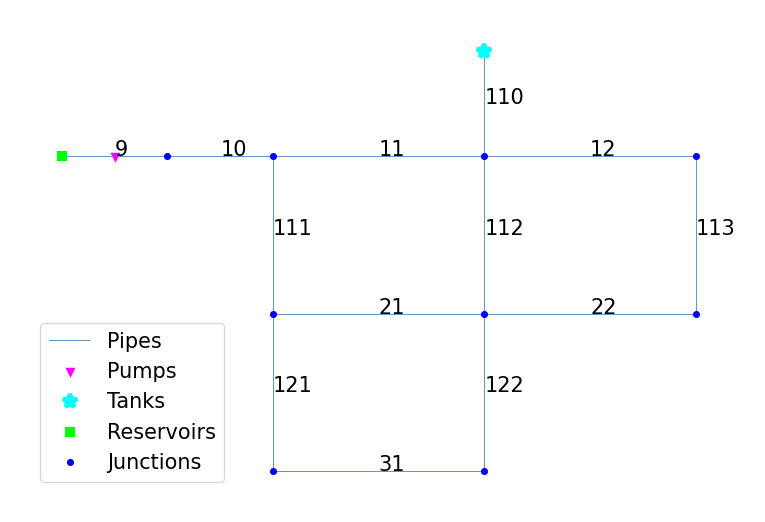

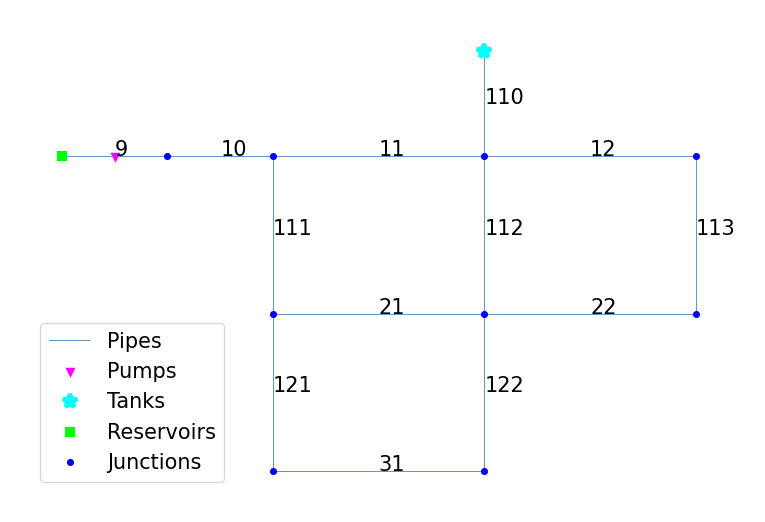

In [85]:
d.plot(linksID=True)

In [86]:
Tindex=d.getNodeTankIndex()

In [96]:
Lindex=d.getLinkIndex('110')
print(Lindex)

7


In [88]:
d.setNodeTankInitialLevel(Tindex,140)
d.setNodeTankMaximumWaterLevel(Tindex,140)

In [89]:
d.setTimeSimulationDuration(3600)

In [90]:
d.solveCompleteHydraulics()

In [91]:
level=d.getNodeTankInitialLevel(Tindex)

In [92]:
if abs(level-140) < 0.0001:
    print("Tank remains full")
else:
    print("Tank doesnot remain full")

Tank remains full


In [93]:
spillage=d.getNodeActualDemand(Tindex)

In [95]:
if abs(spillage)>0.0001:
    print("No spillage occured")
else:
    print("Spillage!!")

No spillage occured


In [99]:
inflow=d.getLinkFlows(Lindex)

In [100]:
if abs(-inflow-spillage)<0.00001:
    print("No outflow or spillage from the tank!")
else:
    print("Outflow or spillage occured in the tank")

No outflow or spillage from the tank!
